In [46]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections  
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [3]:
url = f"https://api.opendota.com/api/teams"
response = requests.get(url)
teams_data = response.json()

In [4]:
falcons_id = []
for teams in teams_data: 
    if teams['name'] == 'Team Falcons': 
        falcons_id = teams['team_id']
        print(falcons_id)

9247354


In [5]:
def team_info(falcons_id):
    url = f"https://api.opendota.com/api/teams/{falcons_id}"
    response = requests.get(url)
    return response.json()

In [6]:
def win_rate(falcons_id):
    team_data = team_info(falcons_id)
    wins = team_data['wins']
    losses = team_data['losses']
    total = wins + losses
    win_rate = (wins / total) * 100 if total > 0 else 0
    return round(win_rate, 1)
print(f"Team Falcons has a winrate of {win_rate(falcons_id)}%")

Team Falcons has a winrate of 73.5%


In [7]:
def get_matches(falcons_id):
    url = f"https://api.opendota.com/api/teams/{falcons_id}/matches"
    response = requests.get(url)
    matches = response.json()
    return matches[:4]

In [8]:
matches = get_matches(falcons_id)

In [9]:
def format_duration(duration):
    hours = duration // 3600             
    minutes = (duration % 3600) // 60    
    seconds = duration % 60    
    if hours > 0:
        return f"{hours}h {minutes}m {seconds}s"
    else:
        return f"{minutes}m {seconds}s"

In [10]:
def team_side(match):
    if match['radiant']:
        return True  
    else:
        return False

In [43]:
match_results = []
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        match_results.append(1)
    else:
        match_results.append(0)
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {match_results}, Duration: {duration_formatted}")

Result: [1], Duration: 46m 44s
Result: [1, 0], Duration: 51m 17s
Result: [1, 0, 1], Duration: 38m 22s
Result: [1, 0, 1, 1], Duration: 44m 9s


In [11]:
for match in matches:
    is_radiant = team_side(match)
    if (is_radiant and match['radiant_win']) or (not is_radiant and not match['radiant_win']):
        result = 'Win'
    else:
        result = 'Lose'
    duration_formatted = format_duration(match['duration'])
    print(f"Result: {result}, Duration: {duration_formatted}")

Result: Win, Duration: 46m 44s
Result: Lose, Duration: 51m 17s
Result: Win, Duration: 38m 22s
Result: Win, Duration: 44m 9s


In [12]:
match_ids = []
for match in matches:
    match_ids.append(match['match_id']) 

In [13]:
count = 0
count1 = 1
total_kils = 0

for match in matches:
    is_radiant = team_side(match)
    radiant_score = match['radiant_score']
    dire_score = match['dire_score']
    total_score_match = radiant_score + dire_score
    total_kils += total_score_match 
    print(f"{count1} Match has {total_score_match} kills")
    if is_radiant == True:
        print(f"Falcons have {radiant_score} kills")
        print(f"The other team has {dire_score} kills")
    
    elif is_radiant == False:
        print(f"Falcons have {dire_score} kills")
        print(f"The other team has {radiant_score} kills")

    count += 1
    count1 += 1
    
mean = (total_kils/count)
print(f"The mean kill at last matches was {mean} kils")
print(f"The number os totals kills was {total_kils}")

1 Match has 35 kills
Falcons have 25 kills
The other team has 10 kills
2 Match has 73 kills
Falcons have 25 kills
The other team has 48 kills
3 Match has 49 kills
Falcons have 32 kills
The other team has 17 kills
4 Match has 72 kills
Falcons have 42 kills
The other team has 30 kills
The mean kill at last matches was 57.25 kils
The number os totals kills was 229


In [14]:
total_duration = 0
for match in matches:
    total_duration += match['duration']  
mean = total_duration / 4
print(f"The total duration time of the matches was {format_duration(total_duration)}")  
print(f"The average duration time of each match was {format_duration(mean)}")  

The total duration time of the matches was 3h 0m 32s
The average duration time of each match was 45.0m 8.0s


In [17]:
def get_match_detail(match_ids):
    url = f"https://api.opendota.com/api/matches/{match_id}"
    response = requests.get(url)
    return response.json()

In [18]:
url = f'https://api.opendota.com/api/teams/{falcons_id}/players'
response = requests.get(url) 
players1 = response.json()
players_name = []
for player in players1:
    account_id = player.get('name')
    in_team = player.get("is_current_team_member")
    if account_id and in_team == True:
        players_name.append(account_id)

In [21]:
mean_kda = {player_name: [] for player_name in players_name} 
mean_kills = {player_name: [] for player_name in players_name} 
mean_deaths = {player_name: [] for player_name in players_name} 
mean_assists = {player_name: [] for player_name in players_name} 

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        player_name = player.get('name', 'Unknown')
        if player_name in players_name:
            kills = player['kills']
            deaths = player['deaths']
            assists = player['assists']
            kda = (kills + assists) / (deaths if deaths > 0 else 1) 

            mean_kda[player_name].append(kda)
            mean_kills[player_name].append(kills)
            mean_deaths[player_name].append(deaths)
            mean_assists[player_name].append(assists)


for player_name in players_name:
    kda_lista = mean_kda[player_name]
    kills_lista = mean_kills[player_name]
    deaths_lista = mean_deaths[player_name]
    assists_lista = mean_assists[player_name]
    
    kda_medio = sum(kda_lista) / len(kda_lista) if kda_lista else 0
    kills_medio = sum(kills_lista) / len(kills_lista) if kills_lista else 0
    deaths_medio = sum(deaths_lista) / len(deaths_lista) if deaths_lista else 0
    assists_medio = sum(assists_lista) / len(assists_lista) if assists_lista else 0
    
    if kda_medio > 0:    
        print(f"The player {player_name} has an average KDA of {kda_medio:.2f}.")
        print(f" - Average kills: {kills_medio:.2f}")
        print(f" - Average deaths: {deaths_medio:.2f}")
        print(f" - Average assists: {assists_medio:.2f}")

The player AMMAR_THE_F has an average KDA of 8.60.
 - Average kills: 8.25
 - Average deaths: 4.75
 - Average assists: 13.75
The player Cr1t- has an average KDA of 7.81.
 - Average kills: 3.50
 - Average deaths: 6.75
 - Average assists: 20.50
The player skiter has an average KDA of 6.75.
 - Average kills: 7.75
 - Average deaths: 4.50
 - Average assists: 12.75
The player Sneyking has an average KDA of 4.39.
 - Average kills: 1.25
 - Average deaths: 7.00
 - Average assists: 22.75
The player Malr1ne has an average KDA of 11.59.
 - Average kills: 10.00
 - Average deaths: 3.50
 - Average assists: 14.50


In [23]:
def get_hero_mapping():
    url = "https://api.opendota.com/api/heroes"
    response = requests.get(url)
    heroes_data = response.json()
    
    hero_mapping = {hero['id']: hero['localized_name'] for hero in heroes_data}
    return hero_mapping

hero_mapping = get_hero_mapping()

In [24]:
hero_counter = collections.Counter()

for match_id in match_ids:
    match_data = get_match_detail(match_id)
    players = match_data['players']
    
    for player in players:
        hero_id = player['hero_id']
        hero_counter[hero_id] += 1

top_heroes = hero_counter.most_common(5)

print("Heroes that appeared most in recent matches:")
for hero_id, count in top_heroes:
    hero_name = hero_mapping.get(hero_id, "Unknown")
    print(f"Hero {hero_name} appeared {count} times.")

Heroes that appeared most in recent matches:
Hero Pangolier appeared 3 times.
Hero Muerta appeared 3 times.
Hero Doom appeared 3 times.
Hero Pugna appeared 2 times.
Hero Razor appeared 2 times.


In [51]:
data = []

for player_name in players_name:
    for i, kda in enumerate(mean_kda[player_name]):
        data.append({
            'match_id': match_ids[i],
            'player_name': player_name,
            'kda': kda,
            'kills': mean_kills[player_name][i],
            'deaths': mean_deaths[player_name][i],
            'assists': mean_assists[player_name][i]
        })

df = pd.DataFrame(data)

In [52]:
df

,match_id,player_name,kda,kills,deaths,assists
0,8017939749,AMMAR_THE_F,21.000000,9,1,12
1,8017791697,AMMAR_THE_F,1.714286,6,7,6
2,8017637141,AMMAR_THE_F,7.666667,8,3,15
3,8016425064,AMMAR_THE_F,4.000000,10,8,22
4,8017939749,Cr1t-,18.000000,1,1,17
5,8017791697,Cr1t-,1.500000,2,12,16
6,8017637141,Cr1t-,8.666667,4,3,22
7,8016425064,Cr1t-,3.090909,7,11,27
8,8017939749,skiter,2.800000,7,5,7
9,8017791697,skiter,1.875000,9,8,6


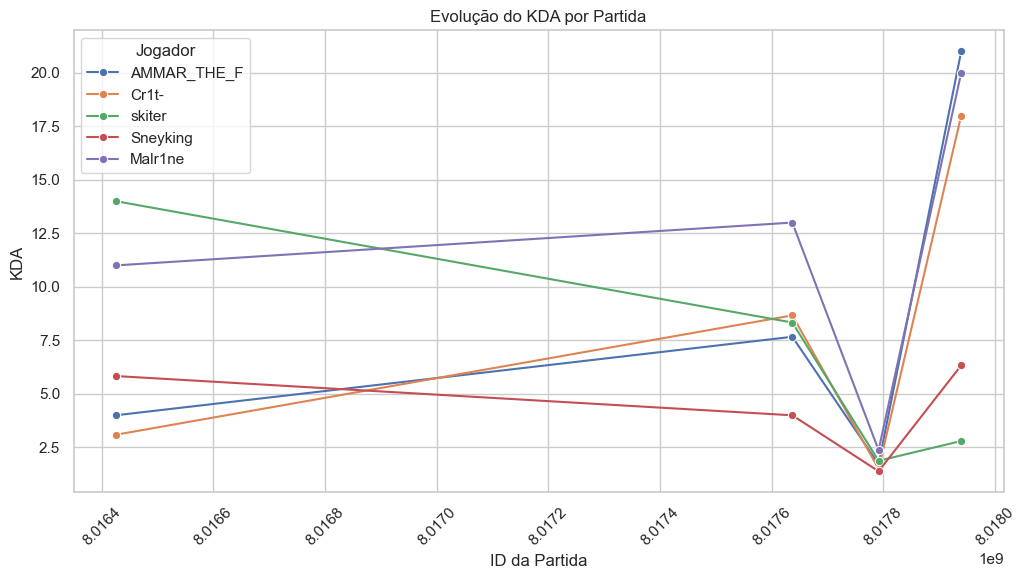

In [53]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_id', y='kda', hue='player_name', marker='o')

plt.title("Evolução do KDA por Partida")
plt.xlabel("ID da Partida")
plt.ylabel("KDA")
plt.legend(title="Jogador")
plt.xticks(rotation=45)
plt.show()

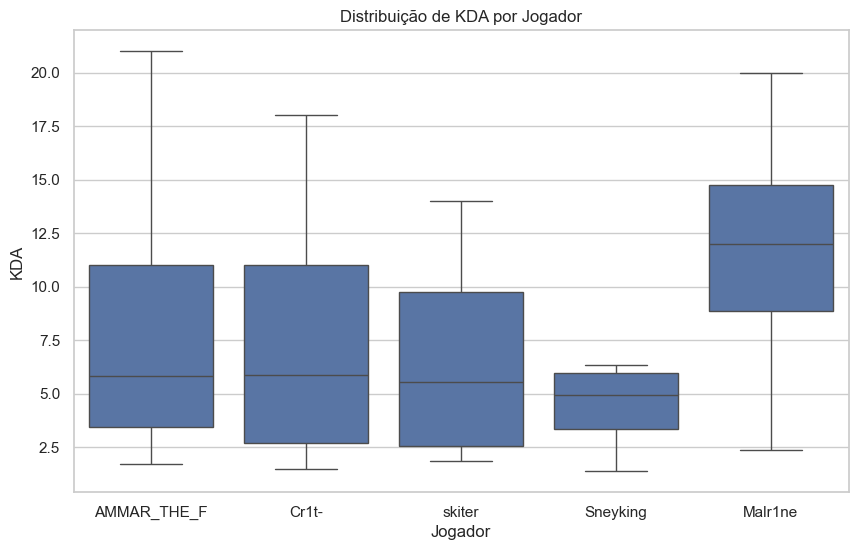

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='player_name', y='kda')
plt.title("Distribuição de KDA por Jogador")
plt.xlabel("Jogador")
plt.ylabel("KDA")
plt.show()

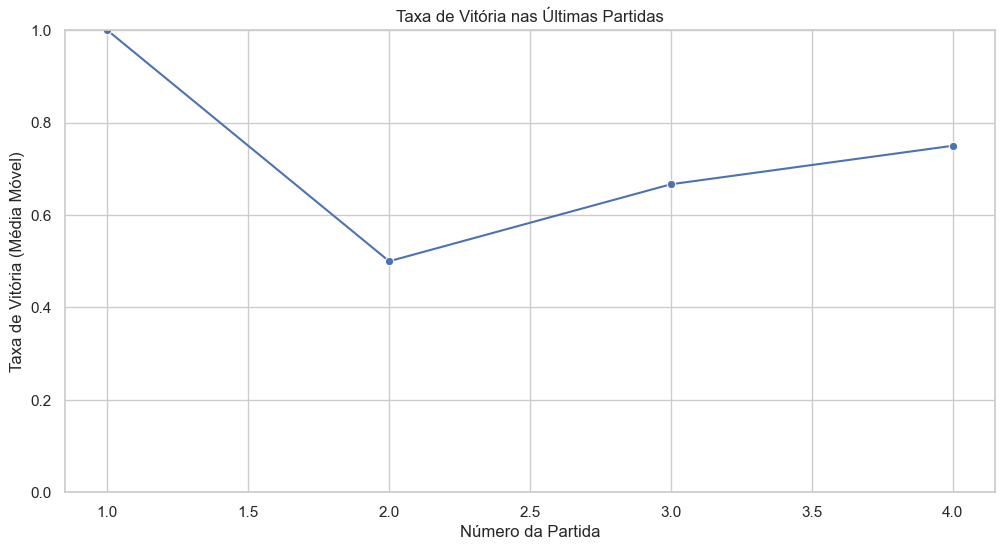

In [45]:
df = pd.DataFrame({'win_result': match_results})
df['match_number'] = range(1, len(df) + 1)  
df['moving_win_rate'] = df['win_result'].rolling(window=5, min_periods=1).mean()  
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='match_number', y='moving_win_rate', marker='o', color='b')
plt.title("Taxa de Vitória nas Últimas Partidas")
plt.xlabel("Número da Partida")
plt.ylabel("Taxa de Vitória (Média Móvel)")
plt.ylim(0, 1)  1

plt.show()